#Séance 3: Prédiction de churn, Partie II

Jessica Fornetti (AMSD)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


#Partie I : Random Forest

## Dataset Credit Fraud

In [10]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


On separe notre dataset en train et test sets

In [11]:
x = df.drop(['Class'], axis=1)
y =df.Class

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 1989)

On scale les data, pour que aucun attribut n'ait plus d'importance que les autres 

In [13]:
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

###Random Forest

On fait un modèle Random Forest avec les hyperparamètres par défaut

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

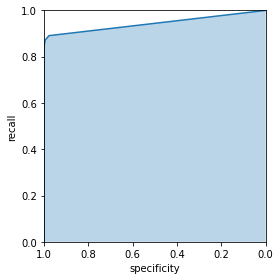

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))

0.943879962646233


On obtient un très bon modèle avec un AUC de 0.94

###Passons maintenant a la partie Grid Search

###Random Forest

On procède à faire un grid search, on cherche les meilleurs hyperparamètres pour le modèle Random Forest. On lui passe la liste des valeur que l'hyperparamètre peut prendre : comme criterion, max_leaf_nodes et min_samples_split utilisés precédemment dans le grid search pour le modèle decision tree. On fait aussi varier la taille de la forêt avec n_estimators. On lui precise aussi quel paramètre optimiser, nous nous interesssons à l'auc (roc_auc_score). On utilise une stratified k-fold cross validation au lieu d'une k-fold normale car on a des classes très deséquilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset

Le grid search teste chaque combinaison de hyperparametres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=3)
space = dict()
space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]


search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x, y)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9351656388749549
Best Hyperparameters: {'criterion': 'log_loss', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50}


On trouve que les meilleurs hyperparamètres sont criterion = log_loss, max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50, avec un score AUC de 0.93

On refait donc un modèle  avec ces hyperparamètres

In [ ]:
rfGS = RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50)
rfGS.fit(x_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=50)

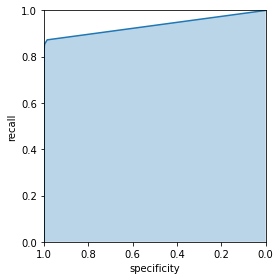

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, rfGS.predict_proba(x_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y_test, rfGS.predict_proba(x_test)[:, 1]))

0.9352670090761978


Notre modèle RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50), trouvé grace au grid search a un AUC similaire au modele avec les hyperparamètres par défault (RandomForestClassifier(n_estimators=100, criterion='gini',min_samples_split=2,max_leaf_nodes=None))

Par rapport aux modèles trouvés lors des grid search de la séance precédente, LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg') avec un AUC de 0.98 et DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 4) avec un AUC de 0.77, le modèle RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50) est meilleur que DecisionTreeClassifier mais moins bon que le modèle de Régression Logistique.

Donc le meilleur modèle pour ce dataset reste  LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg') avec un AUC de 0.98 .

## Dataset Bank Marketing

In [2]:
df2 = pd.read_csv('bank-additional-full.csv', sep = ';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df2['y'] = df2['y'].replace(['no', 'yes'], [0, 1])
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Comme ce dataset contient des variables catégorielles, il faut les transformer en variable numérique en encodant chaque categorie sous forme de int. 
On utilise le LabelEncoder de la bibliotheque sklearn pour le faire de facon automatisé

In [4]:
labelEncoder = LabelEncoder()

df2['job'] = labelEncoder.fit_transform(df2['job']) 
df2['marital'] = labelEncoder.fit_transform(df2['marital']) 
df2['education'] = labelEncoder.fit_transform(df2['education']) 
df2['default'] = labelEncoder.fit_transform(df2['default']) 
df2['housing'] = labelEncoder.fit_transform(df2['housing']) 
df2['loan'] = labelEncoder.fit_transform(df2['loan']) 
df2['contact'] = labelEncoder.fit_transform(df2['contact']) 
df2['month'] = labelEncoder.fit_transform(df2['month']) 
df2['day_of_week'] = labelEncoder.fit_transform(df2['day_of_week'])
df2['poutcome'] = labelEncoder.fit_transform(df2['poutcome'])

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


On partitionne notre dataset en train et test sets

In [5]:
x2 = df2.drop(['y'], axis=1)
y2 =df2.y

In [6]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.2, random_state = 1989)

In [7]:
Scaler_X2 = StandardScaler()
x2_train = Scaler_X2.fit_transform(x2_train)
x2_test = Scaler_X2.transform(x2_test)

###Random Forest

On fait un modèle Random Forest avec les hyperparamètres par défaut

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(x2_train, y2_train)

RandomForestClassifier()

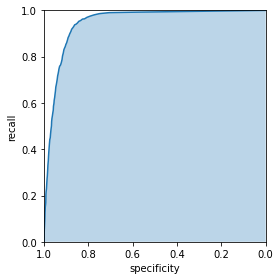

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, rf2.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, rf2.predict_proba(x2_test)[:, 1]))

0.9469320591909841


On obtient un AUC de 0.94, ce qui est un très bon modèle

###Passons maintenant a la partie Grid Search 

###Random Forest

On procède à faire un grid search, on cherche les meilleurs hyperparamètres pour le modèle Random Forest. On lui passe la liste des valeur que l'hyperparamètre peut prendre : comme criterion, max_leaf_nodes et min_samples_split utilisés precédemment dans le grid search pour le modèle decision tree. On fait aussi varier la taille de la forêt avec n_estimators. On lui precise aussi quel paramètre optimiser, nous nous interesssons à l'auc (roc_auc_score). On utilise une stratified k-fold cross validation au lieu d'une k-fold normale car on a des classes très deséquilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset

Le grid search teste chaque combinaison de hyperparametres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()

space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x2, y2)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

On trouve que les meilleurs hyperparamètres sont criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20, avec un score AUC de 0.94

On refait donc un modèle  avec ces hyperparamètres

In [ ]:
rf2GS = RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20)
rf2GS.fit(x2_train, y2_train)

RandomForestClassifier(criterion='log_loss', min_samples_split=3,
                       n_estimators=20)

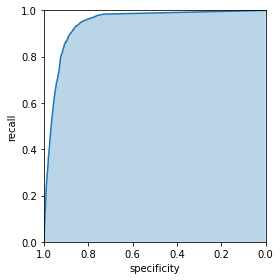

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y2_test, rf2GS.predict_proba(x2_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y2_test, rf2GS.predict_proba(x2_test)[:, 1]))

0.9441172522013948


Notre modèle RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20), trouvé grace au grid search a un AUC très similaire au modèle avec les hyperparamètres par défault (RandomForestClassifier(n_estimators=100, criterion='gini',min_samples_split=2,max_leaf_nodes=None))

Par rapport aux modèles trouvés lors des grid search de la séance precédente, LogisticRegression(penalty='l2', C= 1e-05, solver ='newton-cholesky') avec un AUC de 0.93 et DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4) avec un AUC de 0.71, le modèle RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20) est le meilleur des trois.



Donc le meilleur modèle pour ce dataset est RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20) avec un AUC de 0.94

##Dataset Employee Attrition

In [39]:
df3 = pd.read_csv('whole data.csv')
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [40]:
df3 = df3.dropna()
df3.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [41]:
df3 = df3.drop(columns=["EmployeeCount", "Over18", "StandardHours"])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


In [42]:
df3['Attrition'] = df3['Attrition'].replace(['No', 'Yes'], [0, 1])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


On transforme les variables categorielles en entiers pour pouvoir effectuer nos modeles

In [43]:
labelEncoder2 = LabelEncoder()

df3['BusinessTravel'] = labelEncoder2.fit_transform(df3['BusinessTravel']) 
df3['Department'] = labelEncoder2.fit_transform(df3['Department'])
df3['EducationField'] = labelEncoder2.fit_transform(df3['EducationField'])
df3['Gender'] = labelEncoder2.fit_transform(df3['Gender'])
df3['JobRole'] = labelEncoder2.fit_transform(df3['JobRole'])
df3['MaritalStatus'] = labelEncoder2.fit_transform(df3['MaritalStatus'])


df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,2,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,1,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,2,2,...,2,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,2,1,...,2,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,2,1,...,0,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,2,1,...,1,37020,0.0,20,0,5.0,4,4,1,2


On divise le dataset en train et test sets.

In [44]:
x3 = df3.drop(['Attrition'], axis=1)
y3 =df3.Attrition

In [45]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.2, random_state = 1989)

In [46]:
Scaler_X3 = StandardScaler()
x3_train = Scaler_X3.fit_transform(x3_train)
x3_test = Scaler_X3.transform(x3_test)

###Random Forest

On fait un modèle Random Forest avec les hyperparamètres par défaut

In [ ]:
rf3 = RandomForestClassifier()
rf3.fit(x3_train, y3_train)

RandomForestClassifier()

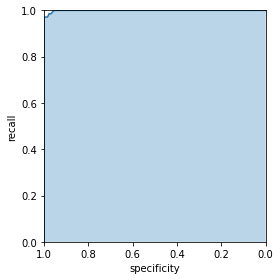

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, rf3.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, rf3.predict_proba(x3_test)[:, 1]))

0.9991768028018639


On obtient un AUC de 0.99 , ce qui est un très bon modèle

###Passons maintenant a la partie Grid Search 

###Random Forest

On procède à faire un grid search, on cherche les meilleurs hyperparamètres pour le modèle Random Forest. On lui passe la liste des valeur que l'hyperparamètre peut prendre : comme criterion, max_leaf_nodes et min_samples_split utilisés precédemment dans le grid search pour le modèle decision tree. On fait aussi varier la taille de la forêt avec n_estimators. On lui precise aussi quel paramètre optimiser, nous nous interesssons à l'auc (roc_auc_score). On utilise une stratified k-fold cross validation au lieu d'une k-fold normale car on a des classes très deséquilibrées,donc on veut s'assurer que chaque sous ensemble soit representatif de notre dataset

Le grid search teste chaque combinaison de hyperparametres afin de trouver les meilleurs en fonction du critère scoring.

In [ ]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5)
space = dict()
space['n_estimators'] = [20, 50, 100]
space['criterion'] = ['gini', 'entropy', 'log_loss']
space['max_leaf_nodes'] = [None]
space['min_samples_split'] = [2, 3, 4]

search = GridSearchCV(model, space, scoring='roc_auc', n_jobs=-1, cv=cv) #On veut que le grid search prenne comme critere l'AUC
result = search.fit(x3, y3)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 50}


On trouve que les meilleurs hyperparamètres sont criterion = gini, max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50, avec un score AUC arondi a 1

On refait donc un modèle avec ces hyperparamètres 

In [ ]:
rf3GS = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50)
rf3GS.fit(x3_train, y3_train)

RandomForestClassifier(n_estimators=50)

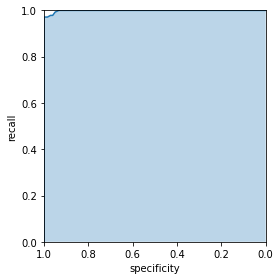

In [ ]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y3_test, rf3GS.predict_proba(x3_test)[:,1])
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
#ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

In [ ]:
print(roc_auc_score(y3_test, rf3GS.predict_proba(x3_test)[:, 1]))

0.9987826659615442


Notre modèle RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50), trouvé grace au grid search est très similaire au modèle avec les hyperparamètres par défault (RandomForestClassifier(n_estimators=100, criterion='gini',min_samples_split=2,max_leaf_nodes=None)), seul le nombre d'estimateurs change.

Par rapport aux modèles trouvés lors des grid search de la séance precédente, LogisticRegression(penalty='l1', C=1, solver='liblinear') avec un AUC de 0.75 et DecisionTreeClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2) avec un AUC de 0.98, le modèle RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50) est le meilleur des trois.



Donc le meilleur modèle pour ce dataset est RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50) avec un AUC très proche de 1

#Partie II : Features les plus important

##Dataset Credit Fraud

On cherche a trouver les features les plus influents pour chaque modèle de classification trouvé lors du grid search

Lors de l'analyse exploratoire on avait trouvé que les variables les plus influentes semblait être les suivantes : V2, V4, V10, V11, V12, V14, V16 V17 et V18

###Regression Logistique

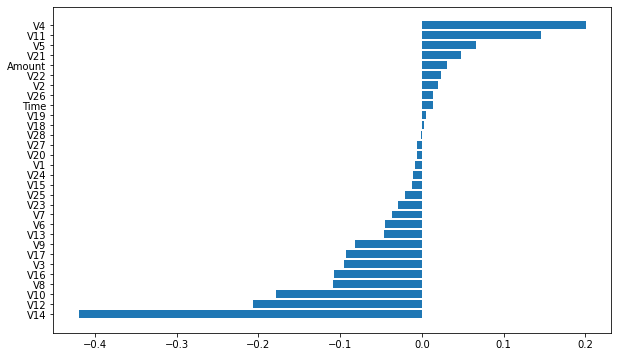

In [52]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df.columns)
lrGS = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg')
lrGS.fit(x_train, y_train)
f_importances(lrGS.coef_[0], features_names)

On voit que les variables les plus influentes sont : V14, V4, V12, V10 et V11. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###Decision Tree

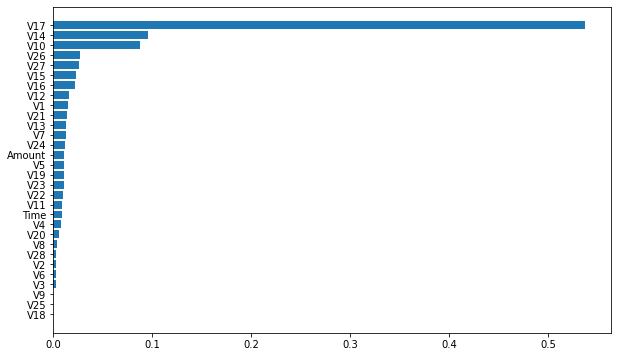

In [51]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df.columns)
dtreeGS = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 4) 
dtreeGS.fit(x_train, y_train)
f_importances(dtreeGS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : V17, V14 et V10. 
Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###Random Forest

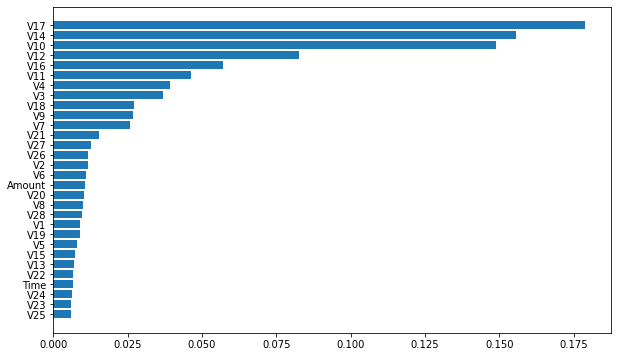

In [50]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df.columns)
rfGS = RandomForestClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50) 
rfGS.fit(x_train, y_train)
f_importances(rfGS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : V17, V14, V10, V12 et V16. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###SVM (sans kernel)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


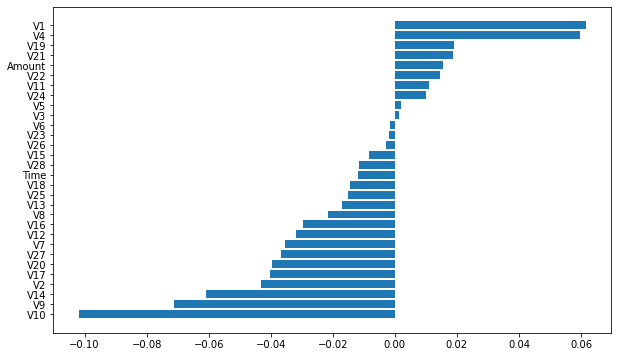

In [32]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df.columns)
svmLinear = LinearSVC()
svmLinear.fit(x_train, y_train)
f_importances(svmLinear.coef_[0], features_names)

On voit que les variables les plus influentes sont : V10, V9, V14, V1 et V4. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

Pour un SVM avec kernel, le modèle ne nous donne pas une liste de coefficients qui permet de retrouver les features les plus importants  car on projette nos features dans une dimension plus élevée

Recap : Les features les plus influents pour chaque modèle se recoupent et rejoinent ce qu'on avait trouvé en partie exploratoire. 
V14, V10 sont influentes pour tous nos modèles.

##Dataset Bank Marketing

On cherche a trouver les features les plus influents pour chaque modèle de classification trouvé lors du grid search

Lors de l'analyse exploratoire on avait trouve que les variables les plus influentes semblait être les suivantes : pdays, emp.var.rate, cons.price.idx, euribor3m, nr.employed, duration et previous

###Régression Logistique

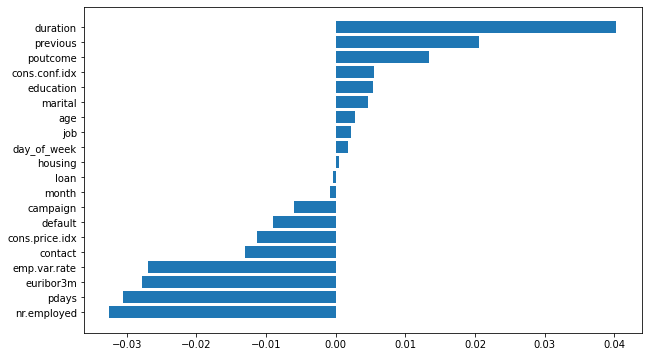

In [53]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df2.columns)
lr2GS = LogisticRegression(penalty='l2', C= 1e-05, solver ='newton-cholesky')
lr2GS.fit(x2_train, y2_train)
f_importances(lr2GS.coef_[0], features_names)

On voit que les variables les plus influentes sont : duration, nr.employed,pdays, euribor3m et emp.var.rate. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###Decision Tree

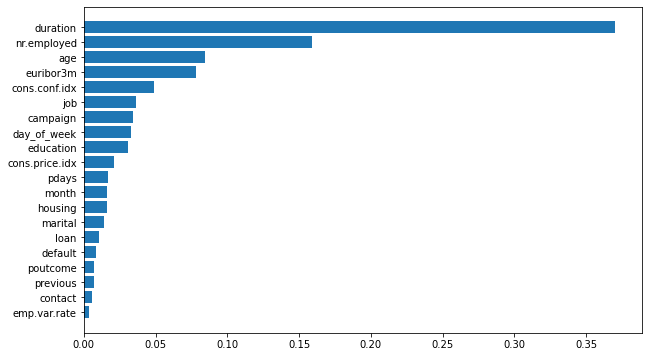

In [54]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df2.columns)
dtree2GS =  DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = None, min_samples_split = 4)
dtree2GS.fit(x2_train, y2_train)
f_importances(dtree2GS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : duration, nr.employed, age, et euribor3m. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###Random Forest

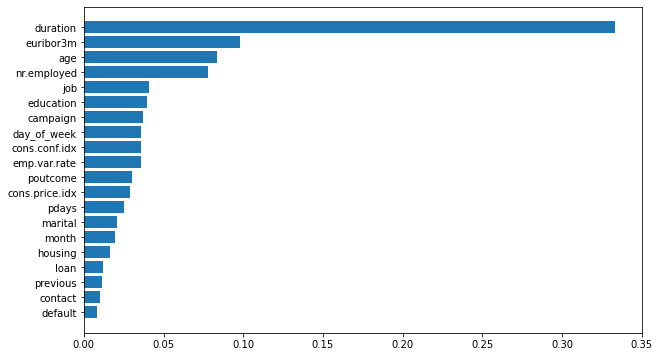

In [55]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df2.columns)
rf2GS = RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20) 
rf2GS.fit(x2_train, y2_train)
f_importances(rf2GS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : duration, euribor3m,  age et nr.employed. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###SVM (sans kernel)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


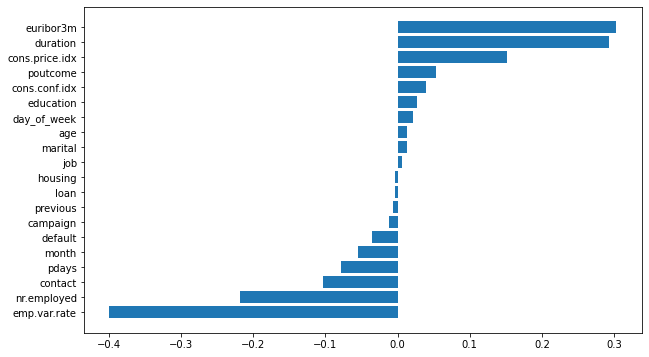

In [38]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df2.columns)
svmLinear2 = LinearSVC()
svmLinear2.fit(x2_train, y2_train)
f_importances(svmLinear2.coef_[0], features_names)

On voit que les variables les plus influentes sont : emp.var.rate, euribor3m, duration et nr.employed. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

Pour un SVM avec kernel, le modèle ne nous donne pas une liste de coefficients qui permet de retrouver les features les plus importants car on projette nos features dans une dimension plus élevée

Recap : Les features les plus influents pour chaque modèle se recoupent et rejoinent ce qu'on avait trouvé en partie exploratoire. 
Les features duration, euribor3m et nr.employed sont influents pour tous nos modèles.

##Dataset Employee Attrition

On cherche a trouver les features les plus influents pour chaque modèle de classification trouvé lors du grid search

Lors de l'analyse exploratoire on avait trouvé que les variables les plus influentes semblait être les suivantes : Age, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager et EnvironmentSatifaction.


###Regression Logistique

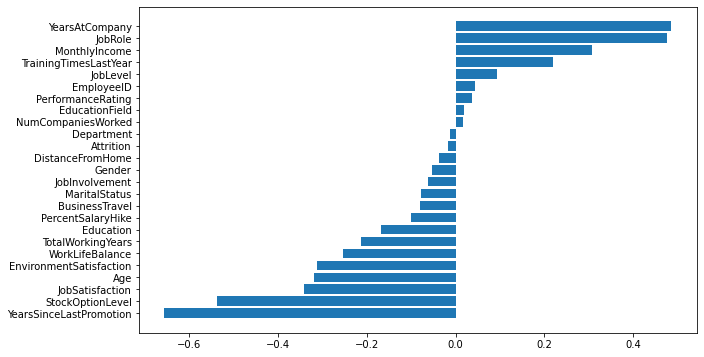

In [56]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df3.columns)
lr3GS = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lr3GS.fit(x3_train, y3_train)
f_importances(lr3GS.coef_[0], features_names)

On voit que les variables les plus influentes sont : YearsSinceLastPromotion, StockOptionLevel, YearsAtCompany, JobRole et Age. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

###Decision Tree

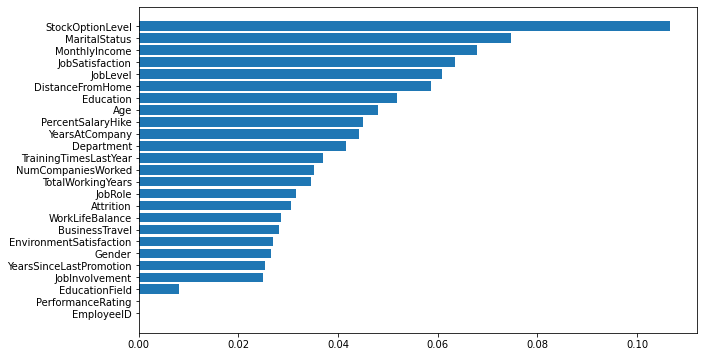

In [57]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df3.columns)
dtree3GS =  DecisionTreeClassifier(criterion = 'log_loss', max_leaf_nodes = None, min_samples_split = 2) 
dtree3GS.fit(x3_train, y3_train)
f_importances(dtree3GS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : StockOptionLevel, MaritalStatus, MonthlyIncome, JobSatisfaction et JobLevel. Cela ne reflète pas vraiment ce qu'on avait trouvé dans la partie analyse exploratoire



###Random Forest

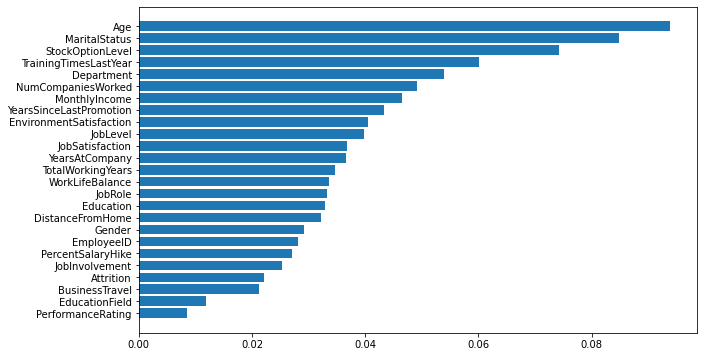

In [58]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df3.columns)
rf3GS = RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50)
rf3GS.fit(x3_train, y3_train)
f_importances(rf3GS.feature_importances_, features_names)

On voit que les variables les plus influentes sont : Age, MaritalStatus,  StockOptionLevel et TrainingTimesLastYear. Cela ne reflète pas vraiment ce qu'on avait trouvé dans la partie analyse exploratoire



###SVM (sans kernel)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


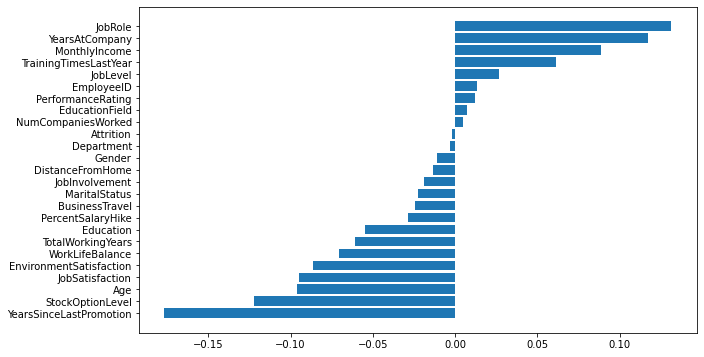

In [59]:
def f_importances(coef, names):
    plt.figure(figsize=(10,6))
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = list(df3.columns)
svmLinear3 = LinearSVC()
svmLinear3.fit(x3_train, y3_train)
f_importances(svmLinear3.coef_[0], features_names)

On voit que les variables les plus influentes sont : YearsSinceLastPromotion, JobRole, StockOptionLevel, YearsAtCompany et Age. Cela semble logique avec ce qu'on avait trouvé dans la partie analyse exploratoire

Pour un SVM avec kernel, le modèle ne nous donne pas une liste de coefficients qui permet de retrouver les features les plus importants car on projette nos features dans une dimension plus élevée

Recap : Les features les plus influents pour les modèles Regression Logistique et SVM se recoupent et rejoinent ce qu'on avait trouvé en partie exploratoire. YearsSinceLastPromotion, StockOptionLevel, YearsAtCompany, JobRole et Age sont influentes pour ces modèles.

Par contre pour les modèles Decision Tree et Random Forest, on trouve des resultats differents qui ne reflètent pas vraiment la partie exploratoire. StockOptionLevel et MaritalSatus sont influentes pour ces modèles.



##Conclusion
 

Pour le dataset Credit Fraud, le meilleur modèle est LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg') avec un AUC de 0.98 et V14, V4, V12, V10 et V11 comme les features les plus influents 

Pour le datset Bank Marketing, le meilleur modèle est RandomForestClassifier(criterion= 'log_loss', max_leaf_nodes= None, min_samples_split= 3, n_estimators= 20) avec un AUC de 0.94 et duration, euribor3m, age et nr.employed comme les features les plus influents

Pour le datset Employee Attrition, le meilleur modèle est  RandomForestClassifier(criterion = 'gini', max_leaf_nodes = None, min_samples_split = 2, n_estimators = 50) avec un AUC tres proche de 1 et Age, MaritalStatus, StockOptionLevel et TrainingTimesLastYear comme les features les plus influents